In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
# 결측치 제거
fish.isnull().sum()

Species     0
Weight      0
Length      0
Diagonal    0
Height      0
Width       0
dtype: int64

In [4]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [5]:
fish_data = [fish]

In [6]:
species_mapping = {'Bream':0, 'Roach':1, 'Whitefish':2, 'Parkki':3, 'Perch':4, 'Pike':5, 'Smelt':6}
for fish in fish_data:
    fish['Species'] = fish['Species'].map(species_mapping)

In [7]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,0,242.0,25.4,30.0,11.5200,4.0200
1,0,290.0,26.3,31.2,12.4800,4.3056
2,0,340.0,26.5,31.1,12.3778,4.6961
3,0,363.0,29.0,33.5,12.7300,4.4555
4,0,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,6,12.2,12.2,13.4,2.0904,1.3936
155,6,13.4,12.4,13.5,2.4300,1.2690
156,6,12.2,13.0,13.8,2.2770,1.2558
157,6,19.7,14.3,15.2,2.8728,2.0672


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
from sklearn.model_selection import train_test_split

x_data=fish.loc[:, ['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
y_data=fish.loc[:, ['Species']]
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(127, 5) (127, 1)
(32, 5) (32, 1)


In [10]:
X_train.head()

,Weight,Length,Diagonal,Height,Width
24,700.0,35.0,40.5,16.2405,5.5890
71,300.0,26.0,29.0,11.3680,4.2340
148,9.7,11.0,12.0,2.1960,1.3800
132,430.0,38.0,40.5,7.2900,4.5765
153,9.8,12.0,13.2,2.2044,1.1484


In [11]:
y_train.head()

,Species
24,0
71,3
148,6
132,5
153,6


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.5625
[[ 6  0  0  2  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  3  0  0]
 [ 2  0  0 10  0  0]
 [ 1  0  0  0  2  0]
 [ 0  0  0  2  0  0]]


C:\Users\lydia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.875
[[ 8  0  0  0  0  0]
 [ 0  3  0  0  0  1]
 [ 0  3  0  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  2]]


C:\Users\lydia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lydia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))

C:\Users\lydia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- Neural Network Classifier ---
0.71875
[[ 8  0  0  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  1  0  2  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  2  1  0]
 [ 0  0  0  0  0  2]]


C:\Users\lydia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.71875
[[8 0 0 0 0 0]
 [0 1 0 2 0 1]
 [0 0 2 1 0 0]
 [0 5 0 7 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 2]]


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.84375
[[ 8  0  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  2  0  0  0]
 [ 0  2  0 10  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  2]]


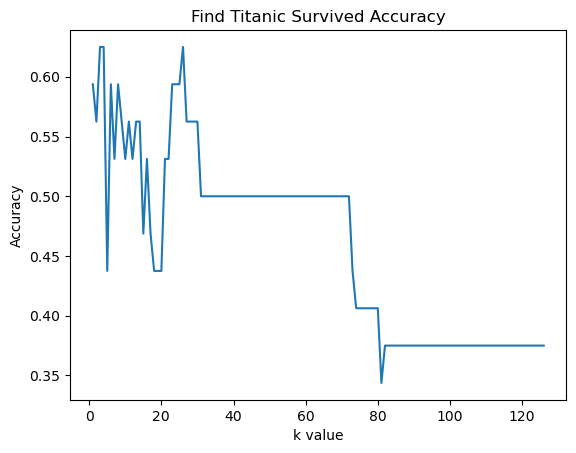

In [18]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

k_range = range(1, 127)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Titanic Survived Accuracy")
plt.show()